In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import os
import warnings
import IPython.display
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('/.../utils')
from sound_utils import load_sound_file

In [ ]:
warnings.filterwarnings("ignore")
plt.style.use("Solarize_Light2")
prop_cycle = plt.rcParams["axes.prop_cycle"]
colors = prop_cycle.by_key()["color"]

In [ ]:
# Create the directory if it doesn't exist
IMAGE_PATH = "./img"
os.makedirs(IMAGE_PATH, exist_ok=True)

#Load data

In [ ]:
# Define directories with wav files
normal_dir = "/.../NormalSound"
anomaly_dir = "/.../AnomalousSound"
sr=16000 #Downsample from 48K

In [ ]:
# Select individual cases of normal and abno
normal_signal_file = os.path.join(
    normal_dir,"1100010001_ToyCar_case1_normal_IND_ch1_0001.wav"
)  # only one pair of sound clips selected
abnormal_signal_file = os.path.join(
    anomaly_dir, "1101010001_ToyCar_case1_ab01_IND_ch1_0001.wav"
)
normal_signal, _ = load_sound_file(normal_signal_file)
abnormal_signal, y = load_sound_file(abnormal_signal_file)

print(
    f"The signals have a {normal_signal.shape} shape. At {sr} Hz, these are {normal_signal.shape[0] / sr:.0f}s signals."
)


The signals have a (528000,) shape. At 16000 Hz, these are 33s signals.


In [ ]:
IPython.display.Audio(normal_signal_file, rate=sr)

In [ ]:
IPython.display.Audio(abnormal_signal_file, rate=sr)

#Waveforms

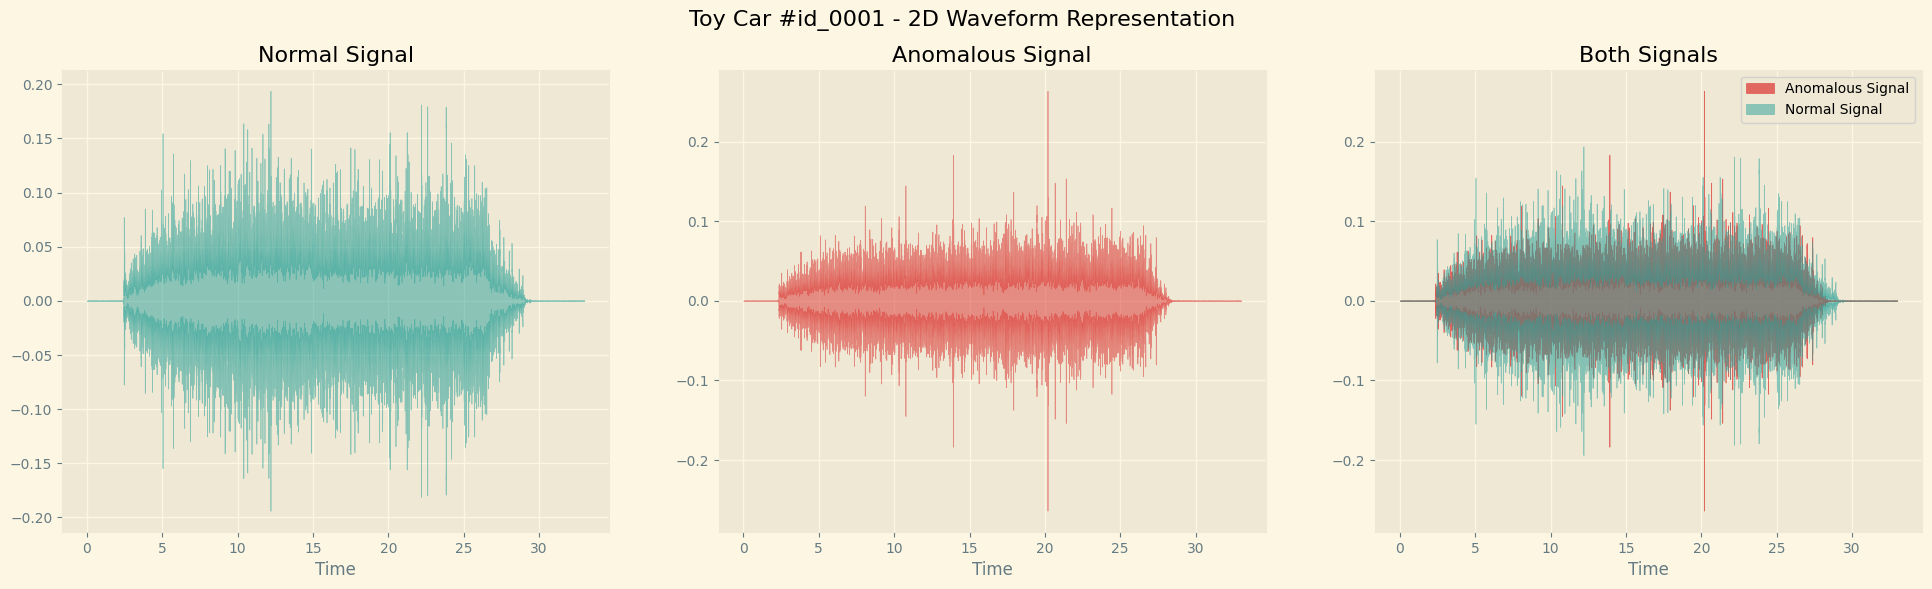

In [ ]:
fig = plt.figure(figsize=(24, 6))

plt.subplot(1, 3, 1)
librosa.display.waveshow(
    normal_signal,
    sr=sr,
    alpha=0.5,
    color=colors[1],
    linewidth=0.5,
    label="Machine #id_0001 - Normal Signal",
)
plt.title("Normal Signal")

plt.subplot(1, 3, 2)
librosa.display.waveshow(
    abnormal_signal,
    sr=sr,
    alpha=0.5,
    color=colors[5],
    linewidth=0.5,
    label="Machine #id_0001 - Anomalous Signal",
)
plt.title("Anomalous Signal")

plt.subplot(1, 3, 3)
librosa.display.waveshow(
    abnormal_signal,
    sr=sr,
    alpha=0.7,
    color=colors[5],
    linewidth=0.5,
    label="Anomalous Signal",
)
librosa.display.waveshow(
    normal_signal,
    sr=sr,
    alpha=0.5,
    color=colors[1],
    linewidth=0.5,
    label="Normal Signal",
)
plt.title("Both Signals")

fig.suptitle("Toy Car #id_0001 - 2D Waveform Representation", fontsize=16)
plt.legend()
plt.show()
fig.savefig(os.path.join(IMAGE_PATH, "wave_forms.svg"), format="svg")



#Short Time Fourier Transform

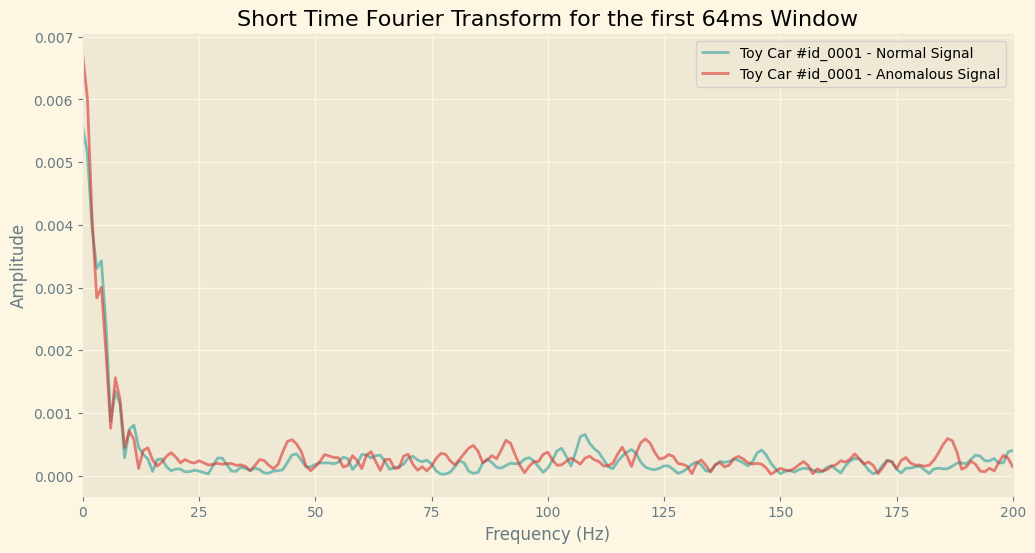

In [ ]:
n_fft = 1024
normal_stft = np.abs(
    librosa.stft(normal_signal[:n_fft], n_fft=n_fft, hop_length=n_fft + 1)
)
abnormal_stft = np.abs(
    librosa.stft(abnormal_signal[:n_fft], n_fft=n_fft, hop_length=n_fft + 1)
)

fig = plt.figure(figsize=(12, 6))
plt.plot(
    normal_stft, color=colors[1], alpha=0.6, label="Toy Car #id_0001 - Normal Signal"
)
plt.plot(
    abnormal_stft, color=colors[5], alpha=0.6, label="Toy Car #id_0001 - Anomalous Signal"
)
plt.title(
    f"Short Time Fourier Transform for the first {n_fft / sr * 1000:.0f}ms Window"
)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.legend()
plt.xlim(0, 200)
plt.show()
fig.savefig(os.path.join(IMAGE_PATH, "stft.svg"), format="svg")

# Spectrograms (dB scale)


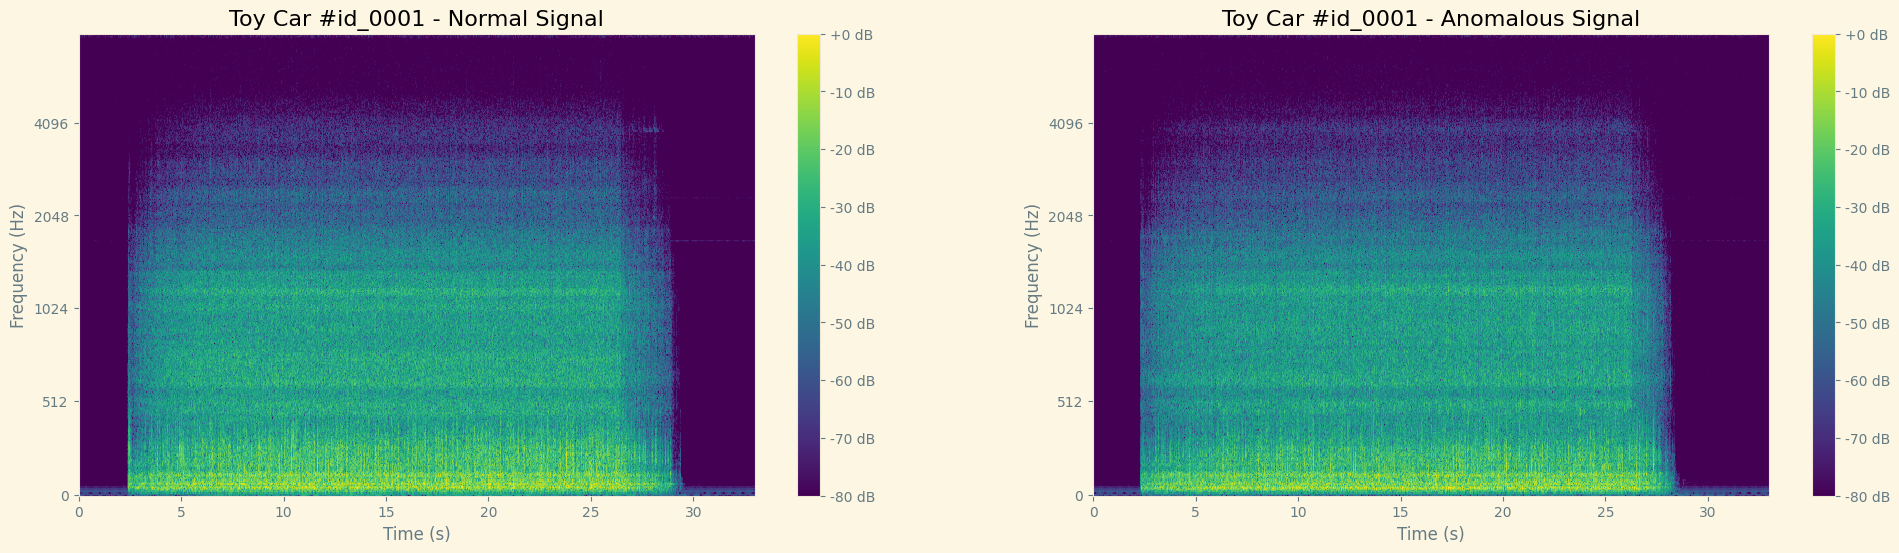

The spectrograms have a (513, 1032) shape.


In [ ]:
hop_length = 512
normal_stft = np.abs(librosa.stft(normal_signal, n_fft=n_fft, hop_length=hop_length))
normal_spectrogram = librosa.amplitude_to_db(normal_stft, ref=np.max)
abnormal_stft = np.abs(
    librosa.stft(abnormal_signal, n_fft=n_fft, hop_length=hop_length)
)
abnormal_spectrogram = librosa.amplitude_to_db(abnormal_stft, ref=np.max)

fig = plt.figure(figsize=(24, 6))

plt.subplot(1, 2, 1)
librosa.display.specshow(
    normal_spectrogram, sr=sr, x_axis="time", y_axis="mel", cmap="viridis"
)
plt.title("Toy Car #id_0001 - Normal Signal")
plt.colorbar(format="%+2.f dB")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")

plt.subplot(1, 2, 2)
librosa.display.specshow(
    abnormal_spectrogram, sr=sr, x_axis="time", y_axis="mel", cmap="viridis"
)
plt.title("Toy Car #id_0001 - Anomalous Signal")
plt.ylabel("Frequency (Hz)")
plt.colorbar(format="%+2.f dB")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")

plt.show()
fig.savefig(os.path.join(IMAGE_PATH, "spectrograms.svg"), format="svg")

print(f"The spectrograms have a {normal_spectrogram.shape} shape.")


# Log-Mel Spectrograms

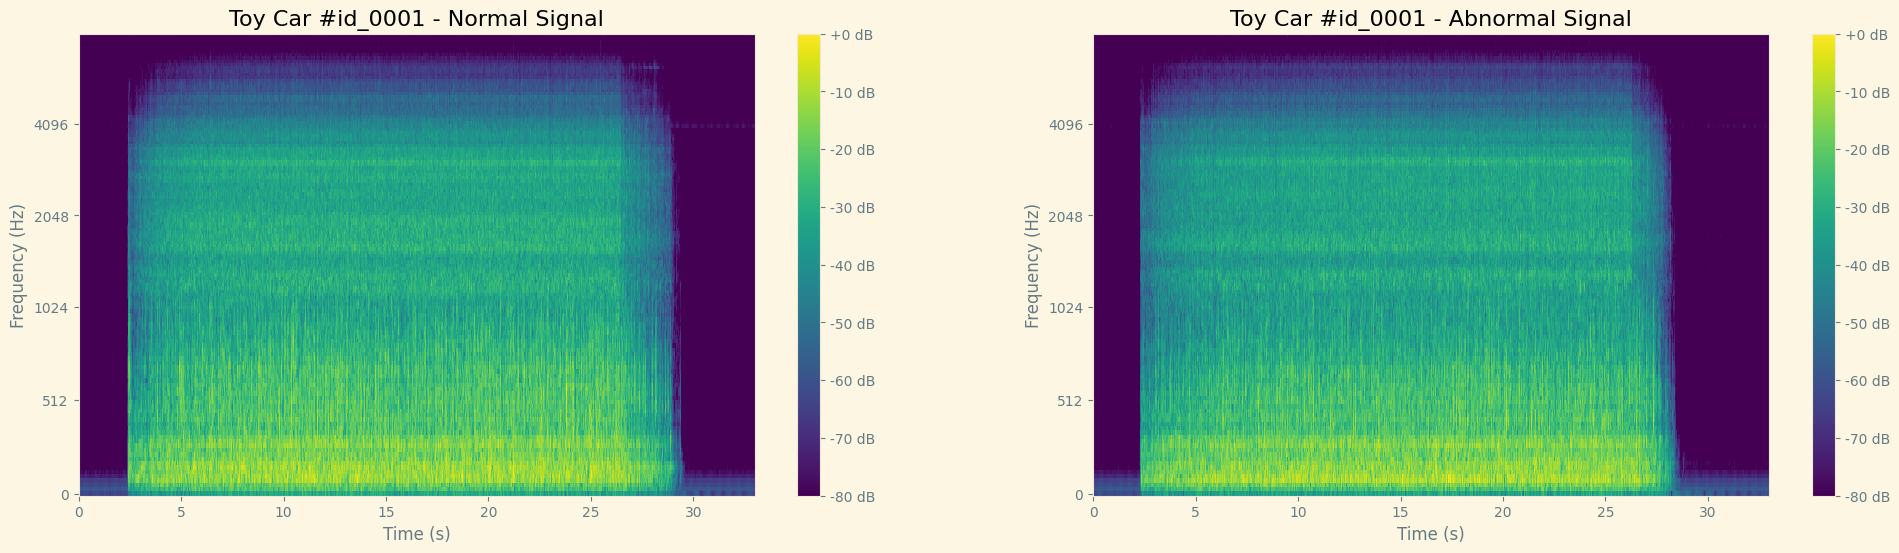

The mel-spectrograms have a (128, 1032) shape.


In [ ]:
n_mels = 128
normal_mel_spectrogram = librosa.feature.melspectrogram(
    y=normal_signal, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels
)
normal_mel_spectrogram = librosa.power_to_db(normal_mel_spectrogram, ref=np.max)

abnormal_mel_spectrogram = librosa.feature.melspectrogram(
    y=abnormal_signal, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels
)
abnormal_mel_spectrogram = librosa.power_to_db(abnormal_mel_spectrogram, ref=np.max)

fig = plt.figure(figsize=(24, 6))

plt.subplot(1, 2, 1)
librosa.display.specshow(
    normal_mel_spectrogram,
    sr=sr,
    hop_length=hop_length,
    x_axis="time",
    y_axis="mel",
    cmap="viridis",
)
plt.title("Toy Car #id_0001 - Normal Signal")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.colorbar(format="%+2.0f dB")

plt.subplot(1, 2, 2)
librosa.display.specshow(
    abnormal_mel_spectrogram,
    sr=sr,
    hop_length=hop_length,
    x_axis="time",
    y_axis="mel",
    cmap="viridis",
)
plt.title("Toy Car #id_0001 - Abnormal Signal")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.colorbar(format="%+2.0f dB")

plt.show()
fig.savefig(os.path.join(IMAGE_PATH, "mel_spectrograms.svg"), format="svg")

print(f"The mel-spectrograms have a {normal_mel_spectrogram.shape} shape.")

#Multiple Frames of Spectrograms

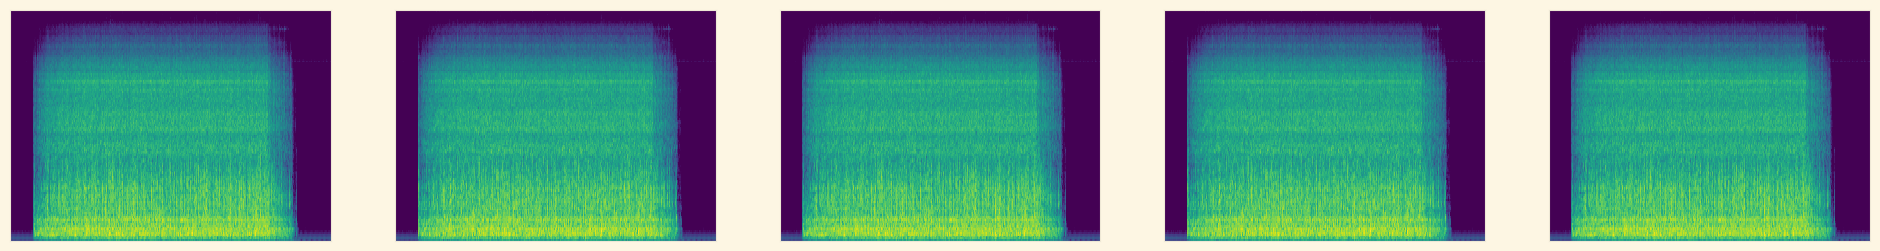

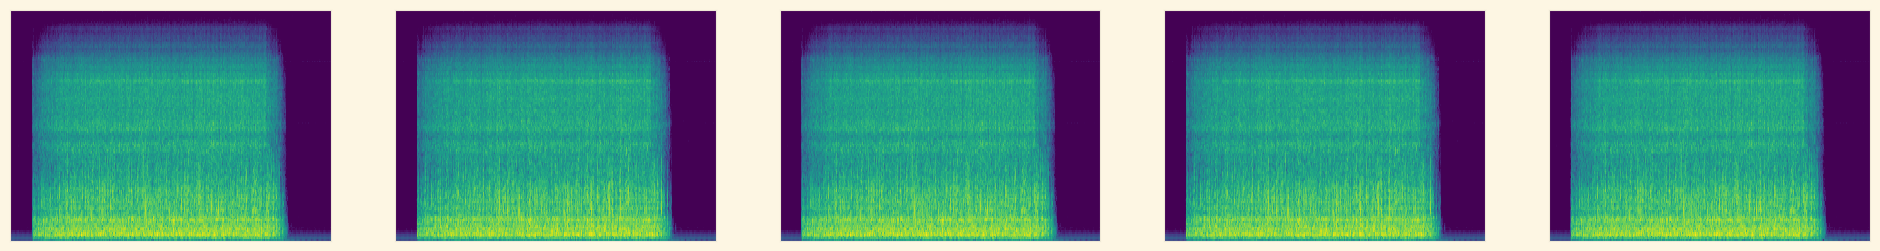

The features have a (1028, 640) shape.


In [ ]:
frames = 5
dims = frames * n_mels

features_vector_size = normal_mel_spectrogram.shape[1] - frames + 1
features = np.zeros((features_vector_size, dims), np.float32)
for t in range(frames):
    features[:, n_mels * t : n_mels * (t + 1)] = normal_mel_spectrogram[
        :, t : t + features_vector_size
    ].T
fig = plt.figure(figsize=(24, 3))
for t in range(frames):
    plt.subplot(1, frames, t + 1)
    librosa.display.specshow(
        features[:, n_mels * t : n_mels * (t + 1)].T,
        sr=sr,
        hop_length=hop_length,
        cmap="viridis",
    )
fig.savefig(os.path.join(IMAGE_PATH, "normal_frames.svg"), format="svg")

features_vector_size = abnormal_mel_spectrogram.shape[1] - frames + 1
features = np.zeros((features_vector_size, dims), np.float32)
for t in range(frames):
    features[:, n_mels * t : n_mels * (t + 1)] = abnormal_mel_spectrogram[
        :, t : t + features_vector_size
    ].T
fig = plt.figure(figsize=(24, 3))
for t in range(frames):
    plt.subplot(1, frames, t + 1)
    librosa.display.specshow(
        features[:, n_mels * t : n_mels * (t + 1)].T,
        sr=sr,
        hop_length=hop_length,
        cmap="viridis",
    )

plt.show()
fig.savefig(os.path.join(IMAGE_PATH, "abnormal_frames.svg"), format="svg")

print(f"The features have a {features.shape} shape.")
